# Feature selection 
### AI camp

In this jupyter notebook, there's **Python 3** code covering some Feature Selection techniques.

The different techniques are going to be executed over the Kaggle competition **Don't Get Kicket!** dataset that can be found here:

https://www.kaggle.com/c/DontGetKicked/data

## Let's read the Don't Get Kicked! dataset

In [1]:
import pandas as pd

cars_dataframe = pd.read_csv("training.csv")
print("Cars dataframe information:")
cars_dataframe.info()

Cars dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               729

In [2]:
print("The first five rows:")
cars_dataframe.head(5)

The first five rows:


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


## Clean the data

The dataset has some NaN values that have to be clean up in order to apply the different feature selection techniques.

**DISCLAIMER: This is not the best way to do it, other ways can improve the final model accuracy**

In [3]:
cars_without_nans = cars_dataframe.fillna({"PRIMEUNIT": "NO"})
cars_without_nans = cars_without_nans.fillna({"AUCGUART": "OTHER"})
# Removes the rows with one NaN or more
cars_without_nans = cars_without_nans.dropna()

Transform PurchDate column to numeric

In [4]:
cars_date_as_numeric = cars_without_nans.copy()
cars_date_as_numeric["PurchDate"] = pd.to_datetime(cars_date_as_numeric["PurchDate"]).dt.strftime("%Y%m%d")
cars_date_as_numeric["PurchDate"] = cars_date_as_numeric["PurchDate"].astype('int64')

Convert categorical columns to numeric type

In [5]:
cars_all_numeric = cars_date_as_numeric.copy()
categorical_columns = cars_all_numeric.select_dtypes(['object']).columns
cars_all_numeric[categorical_columns] = cars_all_numeric[categorical_columns].apply(lambda x: x.astype('category'))
cars_all_numeric[categorical_columns] = cars_all_numeric[categorical_columns].apply(lambda x: x.cat.codes)
cars_all_numeric.head(2)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,20091207,0,2006,3,16,533,131,213,...,11597.0,12409.0,0,1,21973,33619,5,7100.0,0,1113
1,2,0,20091207,0,2004,5,5,0,92,730,...,11374.0,12791.0,0,1,19638,33619,5,7600.0,0,1053


## Get subset of a Pandas dataframe

**Rows:**

data.iloc[0] # first row of data frame

data.iloc[1] # second row of data frame 

data.iloc[-1] # last row of data frame 


**Columns:**

data.iloc[:,0] # first column of data frame 

data.iloc[:,1] # second column of data frame

data.iloc[:,-1] # last column of data frame 

## Lesson 6: Pearson's Correlation

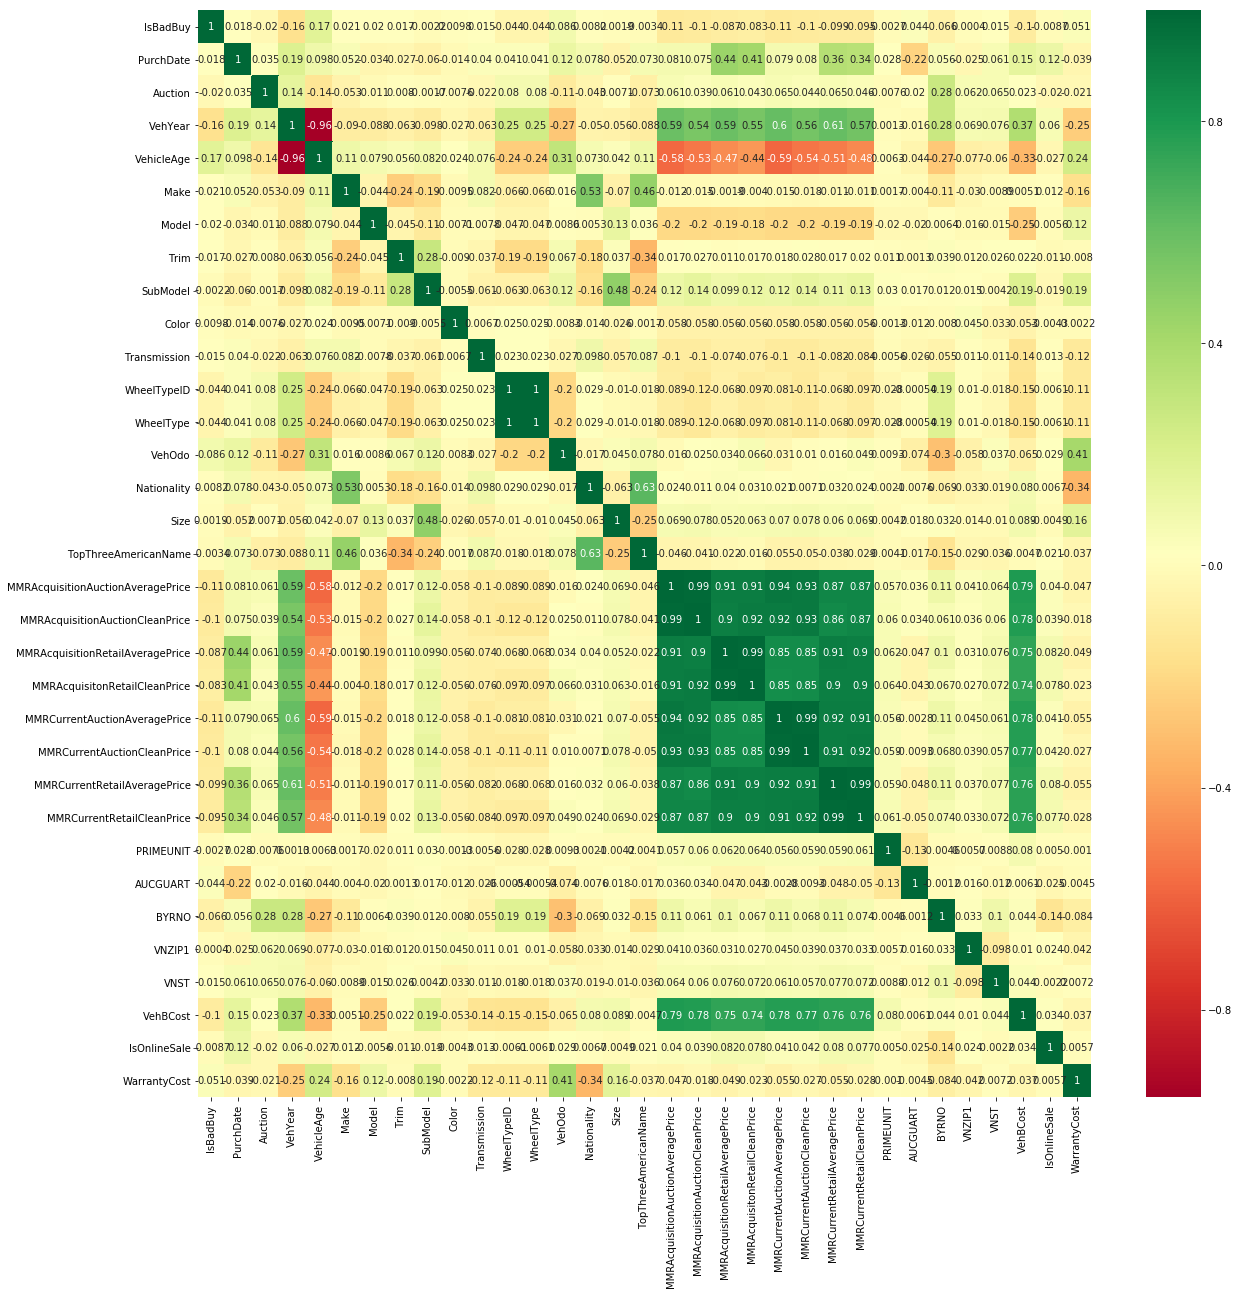

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

correlation_data = cars_all_numeric.iloc[:,1:]
correlation_matrix = correlation_data.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(correlation_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Lesson 9: Chi-square test

**Notice:** It's going to be used the scikit-learn documentation notation for the indepenedent variables and the target variable

**X**-independent variables

**y**-target variable

**X** must contain categorical non-negative features for applying the chi-square test

In [7]:
categorical_columns

Index(['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART', 'VNST'],
      dtype='object')

In [8]:
categorical_columns = cars_date_as_numeric.select_dtypes(['object']).columns

X = cars_all_numeric[categorical_columns]
# The ravel method returns a flattened array
y = cars_date_as_numeric[['IsBadBuy']].values.ravel()  

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

best_k_features = SelectKBest(score_func=chi2, k="all")
fit = best_k_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

feature_scores = pd.concat([dfcolumns, dfscores.round(2)],axis=1)
feature_scores.columns = ['Feature','Score'] 
feature_scores_sorted = feature_scores.sort_values(by=['Score'], ascending=False)

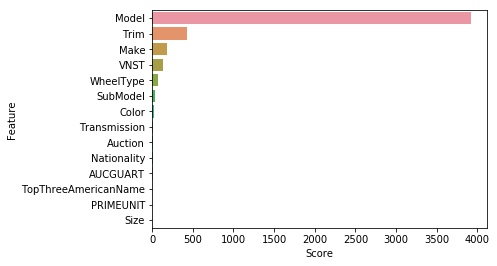

In [10]:
%matplotlib inline
import seaborn as sns
sns.barplot(x="Score", y="Feature", data=feature_scores_sorted)

## Lesson 10: Tree-based feature selection

In [11]:
X = cars_all_numeric.iloc[:,2:]
y = cars_all_numeric[['IsBadBuy']].values.ravel() 

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)

feature_scores = pd.concat([dfcolumns, dfscores.round(4)],axis=1)
feature_scores.columns = ['Feature','Score'] 
feature_scores_sorted = feature_scores.sort_values(by=['Score'], ascending=False)

print(feature_scores_sorted)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


                              Feature   Score
12                             VehOdo  0.0553
29                           VehBCost  0.0535
0                           PurchDate  0.0499
8                               Color  0.0468
23         MMRCurrentRetailCleanPrice  0.0461
27                             VNZIP1  0.0457
20      MMRCurrentAuctionAveragePrice  0.0451
26                              BYRNO  0.0447
22       MMRCurrentRetailAveragePrice  0.0445
21        MMRCurrentAuctionCleanPrice  0.0444
16  MMRAcquisitionAuctionAveragePrice  0.0440
17    MMRAcquisitionAuctionCleanPrice  0.0432
31                       WarrantyCost  0.0431
19      MMRAcquisitonRetailCleanPrice  0.0425
18   MMRAcquisitionRetailAveragePrice  0.0423
28                               VNST  0.0384
5                               Model  0.0310
7                            SubModel  0.0307
6                                Trim  0.0303
3                          VehicleAge  0.0287
1                             Auct

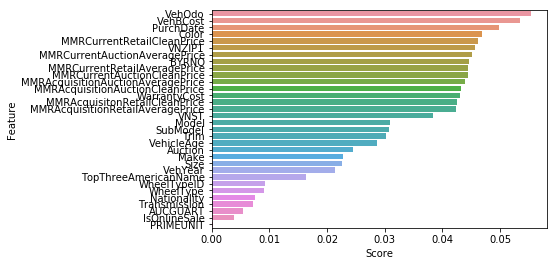

In [13]:
%matplotlib inline
import seaborn as sns

sns.barplot(x="Score", y="Feature", data=feature_scores_sorted)

## Lesson 12: Recursive Feature elimination

Feature ranking with recursive feature elimination

**Scikit-learn RFE**

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

**estimator** : object
A supervised learning estimator with a fit method that provides information about feature importance either through a coef_ attribute or through a feature_importances_ attribute.

**n_features_to_select** : int or None (default=None)
The number of features to select. If None, half of the features are selected.

**step** : int or float, optional (default=1)
If greater than or equal to 1, then step corresponds to the (integer) number of features to remove at each iteration. If within (0.0, 1.0), then step corresponds to the percentage (rounded down) of features to remove at each iteration.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = cars_all_numeric.iloc[:,2:]
y = cars_all_numeric[['IsBadBuy']].values.ravel() 
estimator = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
selector = RFE(estimator=estimator, n_features_to_select=3, step=3)
selector = selector.fit(X, y)
selector.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [15]:
feature_selection_index = np.where(selector.support_ == True)

cars_features_selected = cars_all_numeric.iloc[:,feature_selection_index[0]+2]
cars_features_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67270 entries, 0 to 72982
Data columns (total 3 columns):
Model                                67270 non-null int16
MMRAcquisitionAuctionAveragePrice    67270 non-null float64
VehBCost                             67270 non-null float64
dtypes: float64(2), int16(1)
memory usage: 1.7 MB


The end.